# Pymaceuticals Inc.
---

## Analysis
Based on the provided code, the following conclusions can be drawn:

* **Campomulin and Ramicane Efficacy:** 
These drugs consistently reduce tumor volume, as indicated by their low mean values. They hold promise as effective treatments.

* **Robust Dataset:**
Campomulin and Ramicane have the highest timepoint counts, ensuring a reliable dataset for analysis.

* **Data Quality:** 
Infubinol shows potential outliers, but Campomulin, the main focus, has no outliers, indicating a high-quality dataset.

* **Gender Balance:**
The study exhibits almost equal distribution between male and female mice, reducing potential biases.

* **Campomulin Effectiveness:** 
Tumor volume decreases over time with Campomulin, highlighting its efficacy.

* **Tumor Volume and Rat Weight Correlation:**
A strong correlation exists between tumor volume and rat weight as expected.

In [291]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
joined_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
joined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [292]:
# Checking the number of mice.
mice_count = joined_data_df['Mouse ID'].nunique()
mice_count

249

In [293]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = joined_data_df[joined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Print the duplicate mouse ID
duplicate_mice_ids

array(['g989'], dtype=object)

In [294]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [295]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_joined_data_df = joined_data_df.loc[joined_data_df['Mouse ID'] != 'g989']
cleaned_joined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [296]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = cleaned_joined_data_df["Mouse ID"].nunique()
total_mice_clean

248

## Summary Statistics

In [298]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_joined_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

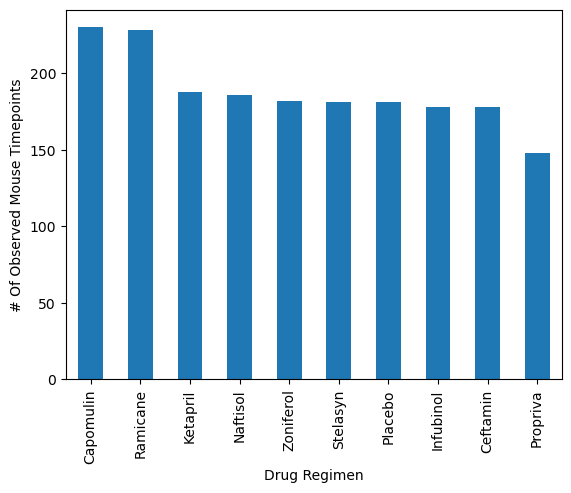

In [299]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = cleaned_joined_data_df['Drug Regimen'].value_counts()

drug_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')

plt.show()

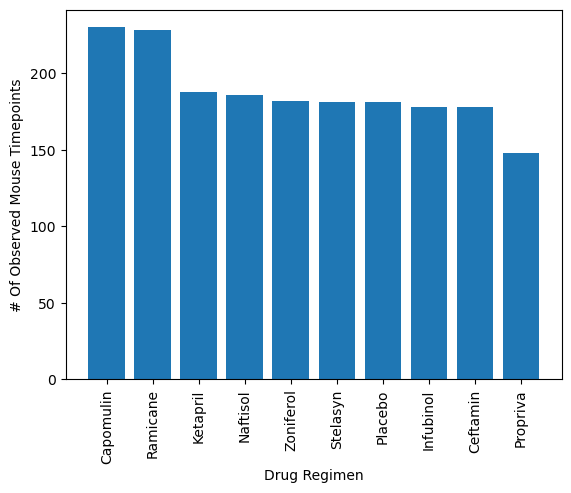

In [300]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_counts.index, drug_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

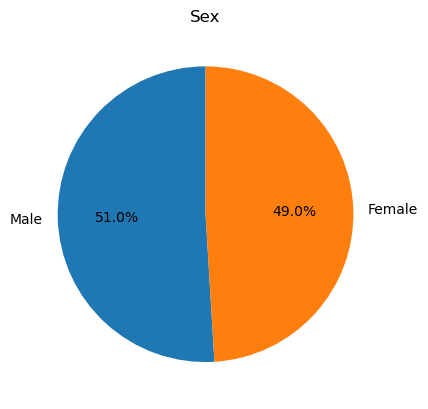

In [301]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_joined_data_df['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sex')
plt.ylabel('')

plt.show()

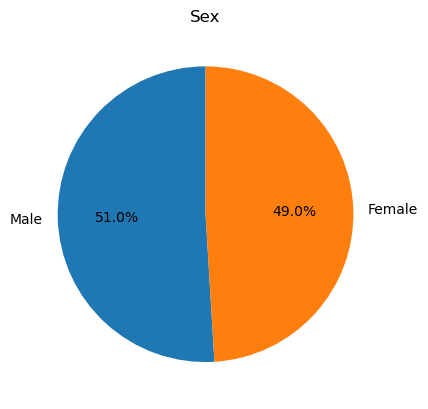

In [302]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [303]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# # Getting the last (greatest) timepoint for each mouse

max_timepoint = cleaned_joined_data_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
max_timepoint_df = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint_df, cleaned_joined_data_df, on=['Mouse ID', 'Timepoint', 'Drug Regimen'], how='left')
final_tumor_volume

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,48.710661,0,Female,12,26
244,z578,Ramicane,45,30.638696,0,Male,11,16
245,z581,Infubinol,45,62.754451,3,Female,24,25
246,z795,Naftisol,45,65.741070,3,Female,13,29


In [310]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


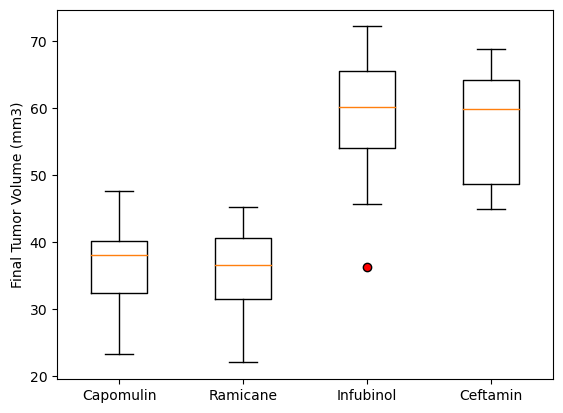

In [305]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments, flierprops={'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

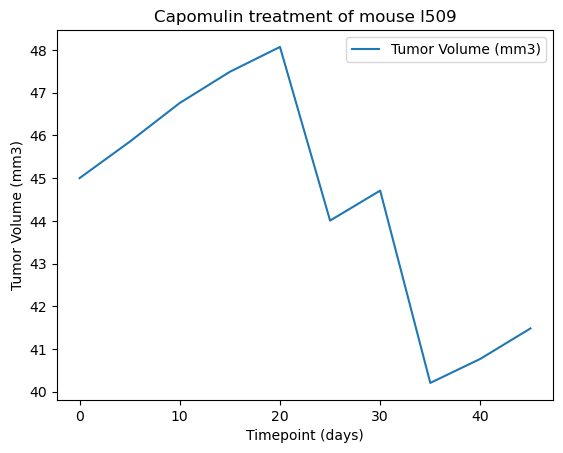

In [306]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mice = cleaned_joined_data_df.loc[cleaned_joined_data_df['Mouse ID'] == 'l509']

mice.plot.line(x= 'Timepoint', y= 'Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


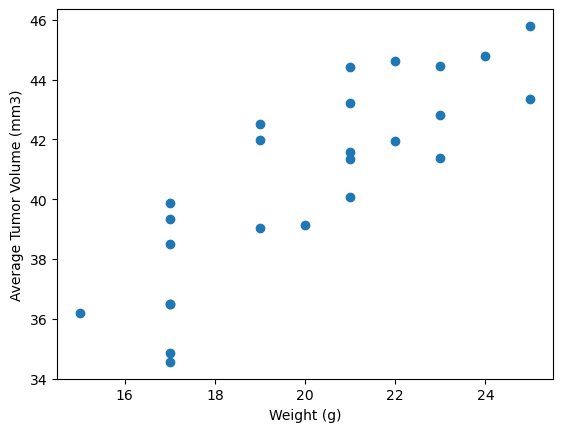

In [307]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = cleaned_joined_data_df[cleaned_joined_data_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


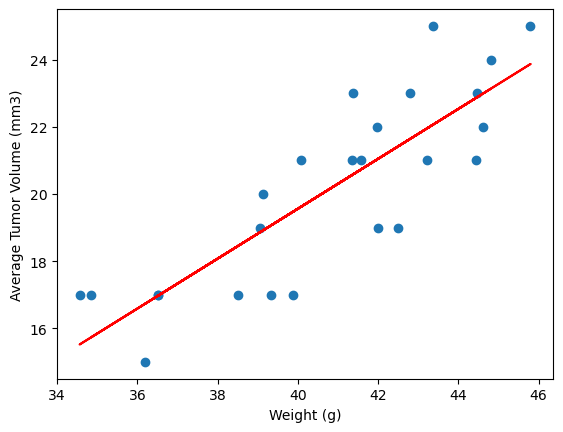

In [308]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(mouse_weight,average_tumor_volume)[0],2)

print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

x_values = average_tumor_volume
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()